Analysis of cardio data to answer analysis questions based on provided csv file

In [1]:
import pandas as pd  # for data manipulation
import numpy as np   # for numerical calculations
import matplotlib.pyplot as plt  # for plotting (optional)

Import the csv file

In [3]:
# Load the dataset
file_path = r'C:\Users\JOHN M\Downloads\Cardio data\cardio_base.csv'
cardio_data = pd.read_csv(file_path)

Check top rows to ensure file loaded correctly

In [4]:
# Display the first few rows
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


Format columns, transform data

In [5]:
# Convert age from days to years and round down
cardio_data['age_years'] = (cardio_data['age'] / 365).astype(int)

In [7]:
# Group by age in years and calculate the mean weight
age_weight_group = cardio_data.groupby('age_years')['weight'].mean()

Find the Age Groups with Highest and Lowest Average Weights

In [8]:
# Find age group with the highest and lowest average weight
max_weight_age_group = age_weight_group.idxmax()
min_weight_age_group = age_weight_group.idxmin()

# Find the corresponding average weights
max_avg_weight = age_weight_group.max()
min_avg_weight = age_weight_group.min()

# Calculate the difference
weight_difference = max_avg_weight - min_avg_weight

print(f"The age group with the highest average weight is {max_weight_age_group} years.")
print(f"The age group with the lowest average weight is {min_weight_age_group} years.")
print(f"The difference in average weight is {weight_difference:.2f} kg.")

The age group with the highest average weight is 63 years.
The age group with the lowest average weight is 30 years.
The difference in average weight is 16.87 kg.


Calculate the differnce in percentage

In [9]:
# Calculate the percentage difference
percentage_difference = ((max_avg_weight - min_avg_weight) / min_avg_weight) * 100

# Display the result
print(f"The difference in average weight is {weight_difference:.2f} kg.")
print(f"The percentage difference between the highest and lowest average weight is {percentage_difference:.2f}%.")

The difference in average weight is 16.87 kg.
The percentage difference between the highest and lowest average weight is 28.60%.


Question 2: Do people over 50  have more cholesterol levels than the rest?

In [10]:
# Create a new column to classify people as over 50 or not
cardio_data['age_over_50'] = cardio_data['age_years'] > 50

# Group the data by this new column and calculate the mean cholesterol level
cholesterol_comparison = cardio_data.groupby('age_over_50')['cholesterol'].mean()

# Extract the cholesterol levels for both groups
cholesterol_over_50 = cholesterol_comparison[True]
cholesterol_under_or_equal_50 = cholesterol_comparison[False]

# Display the results
print(f"Average cholesterol for people over 50: {cholesterol_over_50:.2f}")
print(f"Average cholesterol for people 50 or younger: {cholesterol_under_or_equal_50:.2f}")

# Compare the two
if cholesterol_over_50 > cholesterol_under_or_equal_50:
    print("People over 50 have higher average cholesterol than those 50 or younger.")
else:
    print("People over 50 do not have higher average cholesterol than those 50 or younger.")

Average cholesterol for people over 50: 1.43
Average cholesterol for people 50 or younger: 1.25
People over 50 have higher average cholesterol than those 50 or younger.


Convert the difference to percentage

In [12]:
# Create a new column to classify people as over 50 or not
cardio_data['age_over_50'] = cardio_data['age_years'] > 50

# Group the data by this new column and calculate the mean cholesterol level
cholesterol_comparison = cardio_data.groupby('age_over_50')['cholesterol'].mean()

# Extract the cholesterol levels for both groups
cholesterol_over_50 = cholesterol_comparison[True]
cholesterol_under_or_equal_50 = cholesterol_comparison[False]

# Calculate the percentage difference in cholesterol
cholesterol_percentage_difference = (cholesterol_over_50 - cholesterol_under_or_equal_50) / cholesterol_under_or_equal_50 * 100

# Display the results
print(f"Average cholesterol for people over 50: {cholesterol_over_50:.2f}")
print(f"Average cholesterol for people 50 or younger: {cholesterol_under_or_equal_50:.2f}")
print(f"The percentage difference in cholesterol between the two groups is {cholesterol_percentage_difference:.2f}%")

# Compare the two
if cholesterol_over_50 > cholesterol_under_or_equal_50:
    print("People over 50 have higher average cholesterol than those 50 or younger.")
else:
    print("People over 50 do not have higher average cholesterol than those 50 or younger.")

Average cholesterol for people over 50: 1.43
Average cholesterol for people 50 or younger: 1.25
The percentage difference in cholesterol between the two groups is 14.69%
People over 50 have higher average cholesterol than those 50 or younger.


Question 3: Are men more likely to smoke than women based on gender ID's ?

In [15]:
# Load the dataset (ensure the correct path)
import pandas as pd

cardio_data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\cardio_base.csv')

# Group by gender and calculate the percentage of smokers
smoking_comparison = cardio_data.groupby('gender')['smoke'].mean() * 100

# Display results
print(f"Percentage of smokers among men: {smoking_comparison.get(1, 0):.2f}%")  # Assuming 1 represents male
print(f"Percentage of smokers among women: {smoking_comparison.get(2, 0):.2f}%")  # Assuming 2 represents female

# Compare the two
if smoking_comparison.get(1, 0) > smoking_comparison.get(2, 0):
    print("Men are more likely to be smokers than women.")
else:
    print("Women are more likely to be smokers than men.")

Percentage of smokers among men: 1.79%
Percentage of smokers among women: 21.89%
Women are more likely to be smokers than men.


Question 4: How tall are the tallest 1% of people?

In [16]:
# Load the dataset (ensure the correct path)
cardio_data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\cardio_base.csv')

# Calculate the height threshold for the tallest 1%
height_threshold = cardio_data['height'].quantile(0.99)

# Display the result
print(f"The height of the tallest 1% of people is: {height_threshold:.2f} cm")

The height of the tallest 1% of people is: 184.00 cm


Question 5: which 2 features have the highest spearman rank correlation?

In [18]:
# Calculate the Spearman correlation matrix
spearman_corr = cardio_data.corr(method='spearman')

# Stack the correlation matrix to find pairs of features and their correlation values
correlation_pairs = spearman_corr.stack()

# Remove self-correlations
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Get the maximum correlation and its corresponding feature pair
max_corr = correlation_pairs.idxmax()  # Get the index of the max correlation
max_value = correlation_pairs.max()  # Get the max correlation value

# Display the results
print(f"The two features with the highest Spearman rank correlation are: {max_corr[0]} and {max_corr[1]} with a correlation of {max_value:.2f}")

The two features with the highest Spearman rank correlation are: ap_hi and ap_lo with a correlation of 0.74


Question 6: What percentage of people are more than 2 standard deviations far from the average height?

In [19]:
# Calculate the mean and standard deviation of height
mean_height = cardio_data['height'].mean()
std_dev_height = cardio_data['height'].std()

# Calculate the thresholds for more than 2 standard deviations from the mean
lower_threshold = mean_height - 2 * std_dev_height
upper_threshold = mean_height + 2 * std_dev_height

# Count the number of people outside these thresholds
count_outside = cardio_data[(cardio_data['height'] < lower_threshold) | (cardio_data['height'] > upper_threshold)].shape[0]

# Calculate the total number of people
total_count = cardio_data.shape[0]

# Calculate the percentage
percentage_outside = (count_outside / total_count) * 100

# Display the result
print(f"Percentage of people more than 2 standard deviations away from the average height: {percentage_outside:.2f}%")

Percentage of people more than 2 standard deviations away from the average height: 3.34%


Question 7: What percentage of the population over 50 years old consume alcohol?

_Also use the cardio alco.csv and merge the datasets on ID. Ignore those persons, where we have no alcohol consumption information!_

In [34]:
# Load the cardio data
cardio_data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\cardio_base.csv')

# Load the alcohol data using the correct separator
cardio_alco_data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\cardio_alco.csv', sep=';')

# Display the first few rows and columns to confirm it loaded correctly
print("Cardio Data Head:")
print(cardio_data.head())
print("Cardio Alco Data Head:")
print(cardio_alco_data.head())

# Rename the column to 'alco_id'
cardio_alco_data.rename(columns={'id': 'alco_id'}, inplace=True)

# Check the columns of both DataFrames to confirm the names
print("Cardio Data Columns:")
print(cardio_data.columns)
print("Cardio Alco Data Columns:")
print(cardio_alco_data.columns)

# Merge the datasets on 'id' and 'alco_id'
merged_data = pd.merge(cardio_data, cardio_alco_data, left_on='id', right_on='alco_id', how='inner')

# Filter for individuals over 50 years old
over_50_data = merged_data[merged_data['age'] > 50]

# Calculate the percentage of individuals who consume alcohol (alco = 1)
alcohol_consumption_percentage = (over_50_data['alco'] == 1).mean() * 100

# Display the result
print(f"Percentage of people over 50 who consume alcohol: {alcohol_consumption_percentage:.2f}%")


Cardio Data Head:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0   0  18393       2     168    62.0    110     80            1      0
1   1  20228       1     156    85.0    140     90            3      0
2   2  18857       1     165    64.0    130     70            3      0
3   3  17623       2     169    82.0    150    100            1      0
4   4  17474       1     156    56.0    100     60            1      0
Cardio Alco Data Head:
   id  alco
0  44     0
1  45     0
2  46     0
3  47     0
4  49     0
Cardio Data Columns:
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')
Cardio Alco Data Columns:
Index(['alco_id', 'alco'], dtype='object')
Percentage of people over 50 who consume alcohol: 5.34%


Question 8: Which of the following is true with 95% confidence?

Smokers have higher cholesterol level than non smokers

Smokers weight less than non smokers

Men have higher blood pressure than women

Smokers have higher blood pressure than non-smokers

_To determine which of the statements is true with 95% confidence, you would typically conduct statistical tests (like t-tests or ANOVA) on the relevant data to compare the groups for each statement. Below is an outline of how you might approach verifying these statements statistically, assuming you have access to the relevant data:_

Smokers have higher cholesterol levels than non-smokers:

Test: Compare the mean cholesterol levels between smokers and non-smokers using a t-test.
Hypothesis: Null hypothesis (H0): There is no difference in cholesterol levels. Alternative hypothesis (H1): Smokers have higher cholesterol levels.
Confidence Interval: Calculate the 95% confidence interval for the difference in means.
Smokers weigh less than non-smokers:

Test: Compare the mean weights between smokers and non-smokers using a t-test.
Hypothesis: H0: There is no difference in weight. H1: Smokers weigh less than non-smokers.
Confidence Interval: Calculate the 95% confidence interval for the difference in means.
Men have higher blood pressure than women:

Test: Compare the mean blood pressure readings between men and women using a t-test.
Hypothesis: H0: There is no difference in blood pressure. H1: Men have higher blood pressure than women.
Confidence Interval: Calculate the 95% confidence interval for the difference in means.
Smokers have higher blood pressure than non-smokers:

Test: Compare the mean blood pressure readings between smokers and non-smokers using a t-test.
Hypothesis: H0: There is no difference in blood pressure. H1: Smokers have higher blood pressure than non-smokers.
Confidence Interval: Calculate the 95% confidence interval for the difference in means._

In [36]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\cardio_base.csv')

# Create boolean series for smokers and non-smokers
smokers = data[data['smoke'] == 1]
non_smokers = data[data['smoke'] == 0]

# Hypothesis 1: Smokers have higher cholesterol level than non-smokers
smokers_cholesterol = smokers['cholesterol']
non_smokers_cholesterol = non_smokers['cholesterol']
t_stat_chol, p_value_chol = stats.ttest_ind(smokers_cholesterol, non_smokers_cholesterol)
confidence_chol = p_value_chol < 0.05

# Hypothesis 2: Smokers weigh less than non-smokers
smokers_weight = smokers['weight']
non_smokers_weight = non_smokers['weight']
t_stat_weight, p_value_weight = stats.ttest_ind(smokers_weight, non_smokers_weight)
confidence_weight = p_value_weight < 0.05

# Hypothesis 3: Men have higher blood pressure than women
men_bp = data[data['gender'] == 1]['ap_hi']
women_bp = data[data['gender'] == 2]['ap_hi']
t_stat_bp, p_value_bp = stats.ttest_ind(men_bp, women_bp)
confidence_bp = p_value_bp < 0.05

# Hypothesis 4: Smokers have higher blood pressure than non-smokers
smokers_bp = smokers['ap_hi']
non_smokers_bp = non_smokers['ap_hi']
t_stat_smoker_bp, p_value_smoker_bp = stats.ttest_ind(smokers_bp, non_smokers_bp)
confidence_smoker_bp = p_value_smoker_bp < 0.05

# Output the results
print("Hypothesis 1: Smokers have higher cholesterol level than non-smokers:", confidence_chol)
print("Hypothesis 2: Smokers weigh less than non-smokers:", confidence_weight)
print("Hypothesis 3: Men have higher blood pressure than women:", confidence_bp)
print("Hypothesis 4: Smokers have higher blood pressure than non-smokers:", confidence_smoker_bp)


Hypothesis 1: Smokers have higher cholesterol level than non-smokers: True
Hypothesis 2: Smokers weigh less than non-smokers: True
Hypothesis 3: Men have higher blood pressure than women: False
Hypothesis 4: Smokers have higher blood pressure than non-smokers: False


2nd Dataset: Covid_data.csv

Question 9: When did the differenice in the total number of confirmed cases between Italy and Germany become more than 10 000

In [37]:
# Load the COVID-19 dataset
# Update the path to your dataset file
covid_data = pd.read_csv(r'C:\Users\JOHN M\Downloads\Cardio data\covid_data.csv')

# Display the first few rows to confirm it loaded correctly
print(covid_data.head())

      location        date  new_cases  new_deaths  population  \
0  Afghanistan  2019-12-31          0           0  38928341.0   
1  Afghanistan  2020-01-01          0           0  38928341.0   
2  Afghanistan  2020-01-02          0           0  38928341.0   
3  Afghanistan  2020-01-03          0           0  38928341.0   
4  Afghanistan  2020-01-04          0           0  38928341.0   

   aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                  2.581        1803.987                         0.5  
1                  2.581        1803.987                         0.5  
2                  2.581        1803.987                         0.5  
3                  2.581        1803.987                         0.5  
4                  2.581        1803.987                         0.5  


In [41]:
# Filter for Italy and Germany
italy_data = covid_data[covid_data['location'] == 'Italy'].copy()
germany_data = covid_data[covid_data['location'] == 'Germany'].copy()

# Convert the date column to datetime format
italy_data['date'] = pd.to_datetime(italy_data['date'])
germany_data['date'] = pd.to_datetime(germany_data['date'])

# Set the date as the index
italy_data.set_index('date', inplace=True)
germany_data.set_index('date', inplace=True)

# Calculate cumulative cases for Italy
italy_data['total_cases'] = italy_data['new_cases'].cumsum()

# Calculate cumulative cases for Germany
germany_data['total_cases'] = germany_data['new_cases'].cumsum()

# Merge the two datasets on the date index
merged_data = pd.merge(italy_data[['total_cases']], germany_data[['total_cases']], 
                       left_index=True, right_index=True, suffixes=('_Italy', '_Germany'))

# Calculate the difference in total confirmed cases
merged_data['case_difference'] = merged_data['total_cases_Italy'] - merged_data['total_cases_Germany']

# Find the first date where the difference exceeded 10,000
date_exceeding_10000 = merged_data[merged_data['case_difference'] > 10000].index.min()

# Display the result
if date_exceeding_10000 is not None:
    print(f"The difference in the total number of confirmed cases between Italy and Germany became more than 10,000 on: {date_exceeding_10000.date()}")
else:
    print("The difference never exceeded 10,000 cases.")

The difference in the total number of confirmed cases between Italy and Germany became more than 10,000 on: 2020-03-12


Question 10: Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss.

What is the difference between the exponential curve and the total number of real cases on 2020-03-207

C:\Users\JOHN M\AppData\Local\Temp\ipykernel_13712\2161348383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['date'] = pd.to_datetime(italy_data['date'])


Predicted cumulative cases on 2020-03-20: 42346.69
Actual cumulative cases on 2020-03-20: 40635
Difference: 1711.69


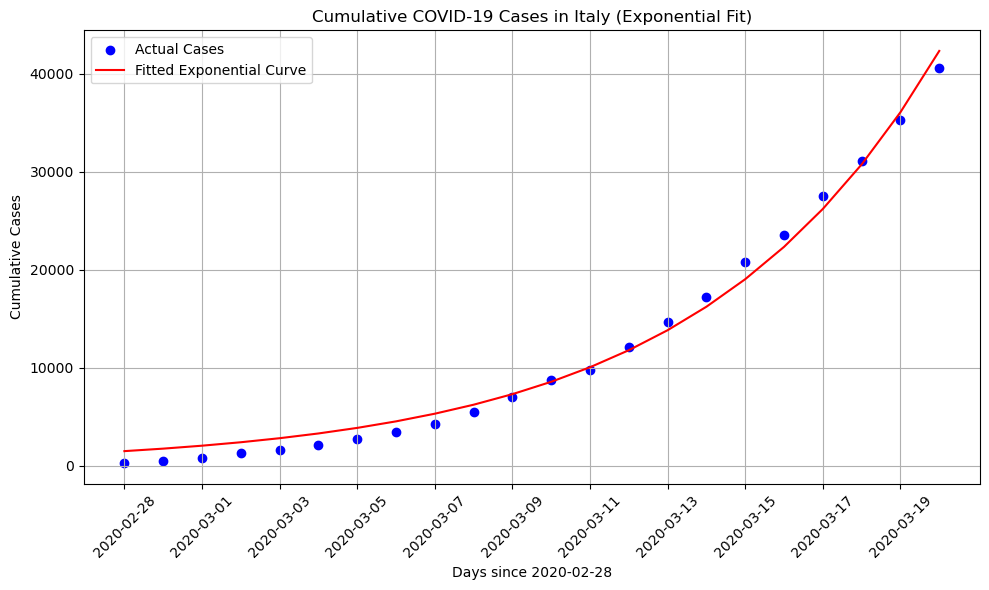

In [42]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Filter for Italy and the specific date range
italy_data = covid_data[covid_data['location'] == 'Italy']
italy_data['date'] = pd.to_datetime(italy_data['date'])
italy_data = italy_data[(italy_data['date'] >= '2020-02-28') & (italy_data['date'] <= '2020-03-20')]

# Calculate cumulative cases
italy_data['total_cases'] = italy_data['new_cases'].cumsum()

# Prepare x and y for curve fitting
x_data = (italy_data['date'] - italy_data['date'].min()).dt.days.values  # Days since first date
y_data = italy_data['total_cases'].values

# Define the exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit the exponential curve
params, covariance = curve_fit(exponential_func, x_data, y_data)

# Calculate the predicted cumulative cases for 2020-03-20 (x = days from start)
days_from_start = (pd.to_datetime('2020-03-20') - italy_data['date'].min()).days
predicted_cases = exponential_func(days_from_start, *params)

# Get the actual cases on 2020-03-20
actual_cases_on_2020_03_20 = italy_data[italy_data['date'] == '2020-03-20']['total_cases'].values[0]

# Calculate the difference
difference = predicted_cases - actual_cases_on_2020_03_20

# Output the results
print(f"Predicted cumulative cases on 2020-03-20: {predicted_cases:.2f}")
print(f"Actual cumulative cases on 2020-03-20: {actual_cases_on_2020_03_20}")
print(f"Difference: {difference:.2f}")

# Plotting the data and the fitted curve for visualization
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Actual Cases', color='blue')
plt.plot(x_data, exponential_func(x_data, *params), label='Fitted Exponential Curve', color='red')
plt.title('Cumulative COVID-19 Cases in Italy (Exponential Fit)')
plt.xlabel('Days since 2020-02-28')
plt.ylabel('Cumulative Cases')
plt.xticks(ticks=np.arange(0, max(x_data)+1, 2), labels=[f'{(italy_data["date"].min() + pd.Timedelta(days=i)).date()}' for i in range(0, max(x_data)+1, 2)], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
